In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("Classified_Data.csv",index_col=0)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
#standarize the variables

In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler ()

In [12]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_features = scaler.transform (df.drop('TARGET CLASS', axis=1))

In [14]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [15]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [16]:
#Machine learning
from sklearn.neighbors import KNeighborsClassifier

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.30, random_state=101)

In [17]:
knn = KNeighborsClassifier (n_neighbors = 1)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [23]:
predictions = knn.predict(X_test)

In [22]:
#Model Evaluation

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print (classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [27]:
print (confusion_matrix(y_test,predictions))

[[151   8]
 [ 15 126]]


In [28]:
# Choosing the optimal K values

In [30]:
error_rate = []
for i in range (1,40):
    knn = KNeighborsClassifier (n_neighbors=i)
    knn.fit (X_train, y_train)
    prediction_i= knn.predict(X_test)
    error_rate.append(np.mean(prediction_i !=y_test))

In [32]:
error_rate

[0.076666666666666661,
 0.089999999999999997,
 0.050000000000000003,
 0.070000000000000007,
 0.056666666666666664,
 0.050000000000000003,
 0.066666666666666666,
 0.059999999999999998,
 0.050000000000000003,
 0.056666666666666664,
 0.053333333333333337,
 0.046666666666666669,
 0.050000000000000003,
 0.056666666666666664,
 0.056666666666666664,
 0.050000000000000003,
 0.050000000000000003,
 0.046666666666666669,
 0.050000000000000003,
 0.053333333333333337,
 0.050000000000000003,
 0.050000000000000003,
 0.063333333333333339,
 0.056666666666666664,
 0.056666666666666664,
 0.050000000000000003,
 0.050000000000000003,
 0.046666666666666669,
 0.059999999999999998,
 0.050000000000000003,
 0.056666666666666664,
 0.046666666666666669,
 0.053333333333333337,
 0.043333333333333335,
 0.046666666666666669,
 0.043333333333333335,
 0.046666666666666669,
 0.043333333333333335,
 0.050000000000000003]

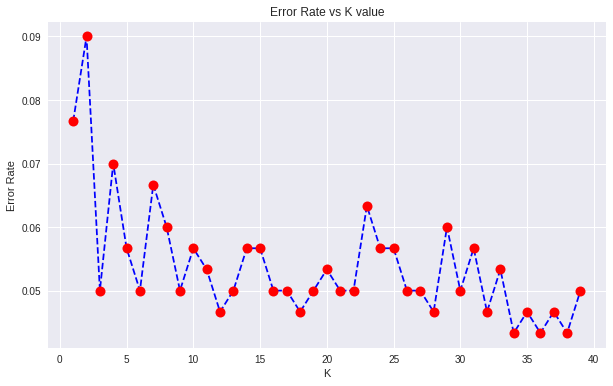

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
knn = KNeighborsClassifier (n_neighbors =34)
knn.fit (X_train, y_train)
predictions = knn.predict(X_test)
print("with K=34")
print('\n')
print (classification_report(y_test,predictions))

with K=34


             precision    recall  f1-score   support

          0       0.96      0.96      0.96       159
          1       0.96      0.95      0.95       141

avg / total       0.96      0.96      0.96       300

